#Loan prediction

Load the libraries

In [323]:
import graphlab
import math
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

Load the data

In [275]:
loans = graphlab.SFrame.read_csv('train_u6lujuX.csv')
test_data = graphlab.SFrame.read_csv('test_Y3wMUE5.csv')

Finished parsing file C:\Users\ranjank\data\mywork\github\av\competitions\loan-prediction\train_u6lujuX.csv

Parsing completed. Parsed 100 lines in 0.068514 secs.

Finished parsing file C:\Users\ranjank\data\mywork\github\av\competitions\loan-prediction\train_u6lujuX.csv

Parsing completed. Parsed 614 lines in 0.066013 secs.

Finished parsing file C:\Users\ranjank\data\mywork\github\av\competitions\loan-prediction\test_Y3wMUE5.csv

Parsing completed. Parsed 100 lines in 0.064024 secs.

------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[str,str,str,str,str,str,long,long,long,long,long,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
------------------------------------------------------

Finished parsing file C:\Users\ranjank\data\mywork\github\av\competitions\loan-prediction\test_Y3wMUE5.csv

Parsing completed. Parsed 367 lines in 0.055998 secs.


Inferred types from first line of file as 
column_type_hints=[str,str,str,str,str,str,long,long,long,long,long,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


## Data Exploration
### Variable Identification

In [276]:
print loans.head()
print loans.column_names()
print loans.column_types()

+----------+--------+---------+------------+--------------+---------------+
| Loan_ID  | Gender | Married | Dependents |  Education   | Self_Employed |
+----------+--------+---------+------------+--------------+---------------+
| LP001002 |  Male  |    No   |     0      |   Graduate   |       No      |
| LP001003 |  Male  |   Yes   |     1      |   Graduate   |       No      |
| LP001005 |  Male  |   Yes   |     0      |   Graduate   |      Yes      |
| LP001006 |  Male  |   Yes   |     0      | Not Graduate |       No      |
| LP001008 |  Male  |    No   |     0      |   Graduate   |       No      |
| LP001011 |  Male  |   Yes   |     2      |   Graduate   |      Yes      |
| LP001013 |  Male  |   Yes   |     0      | Not Graduate |       No      |
| LP001014 |  Male  |   Yes   |     3+     |   Graduate   |       No      |
| LP001018 |  Male  |   Yes   |     2      |   Graduate   |       No      |
| LP001020 |  Male  |   Yes   |     1      |   Graduate   |       No      |
+----------+

### Types of Variables
#### Feature Variables:
1. Gender
2. Married
3. Dependents
4. Education
5. Self_Employed
6. ApplicantIncome
7. CoapplicantIncome
8. LoanAmount
9. Loan_Amount_Term
10. Credit_History
11. Property_Area

#### Target Variables
1. Loan_Status

### Data Types
#### Character
1. Gender
2. Married
3. Dependents
4. Education
5. Self_Employed
6. Property_Area

####Numeric
1. ApplicantIncome
2. CoapplicantIncome
3. LoanAmount
4. Loan_Amount_Term
5. Credit_History

### Variable Category
#### Categorical
1. Gender
2. Married
3. Dependents
4. Education
5. Self_Employed
6. Property_Area
7. Loan_Amount_Term
8. Credit_History

#### Continuous
1. ApplicantIncome
2. CoapplicantIncome
3. LoanAmount

## Univariate Analysis
* Understand the central tendency and spread of the continuous variables.
* Highlight missing and outlier values.

###Continuous Variables
####'ApplicantIncome'

0 no. of values are missing.


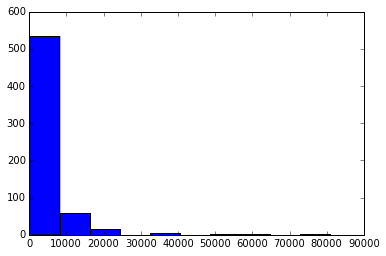

In [277]:
#if any value is missing
number_missing_values = sum(loans['ApplicantIncome'] == None)
print number_missing_values, "no. of values are missing."

#plot the diagram
x = np.arange(0, len(loans['ApplicantIncome'])) 
y = loans['ApplicantIncome']

plt.hist(y)
plt.show()

#### 'CoapplicantIncome'

0 no. of values are missing.


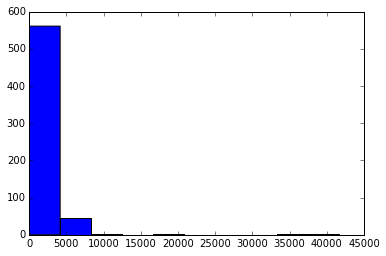

In [278]:
#if any value is missing
number_missing_values = sum(loans['CoapplicantIncome'] == None)
print number_missing_values, "no. of values are missing."

#plot the diagram
x = np.arange(0, len(loans['CoapplicantIncome'])) 
y = loans['CoapplicantIncome']

plt.hist(y)
plt.show()

#### 'LoanAmount'

In [279]:
#if any value is missing
number_missing_values = sum(loans['LoanAmount'] == None)
print number_missing_values, "no. of values are missing."

22 no. of values are missing.


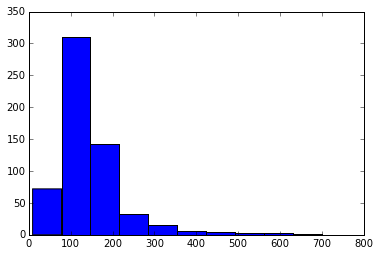

In [280]:
#mean_loan_amount = loans['LoanAmount'].mean()
#loans['LoanAmount'] = [mean_loan_amount if v is None else v for v in loans['LoanAmount']]

loans = loans[loans['LoanAmount'] != None]

#plot the diagram
x = np.arange(0, len(loans['LoanAmount'])) 
y = loans['LoanAmount']

plt.hist(y)
plt.show()

### Categorical

In [281]:
print sum(loans['Gender'] == None), "no. of values are missing in Gender."
print sum(loans['Married'] == None), "no. of values are missing in Married."
print sum(loans['Dependents'] == None), "no. of values are missing in Dependents."
print sum(loans['Education'] == None), "no. of values are missing in Education."
print sum(loans['Self_Employed'] == None), "no. of values are missing in Self_Employed."
print sum(loans['Loan_Amount_Term'] == None), "no. of values are missing in Loan_Amount_Term."
print sum(loans['Credit_History'] == None), "no. of values are missing in Credit_History."
print sum(loans['Property_Area'] == None), "no. of values are missing in Property_Area."

0 no. of values are missing in Gender.
0 no. of values are missing in Married.
0 no. of values are missing in Dependents.
0 no. of values are missing in Education.
0 no. of values are missing in Self_Employed.
14 no. of values are missing in Loan_Amount_Term.
49 no. of values are missing in Credit_History.
0 no. of values are missing in Property_Area.


In [282]:
#mean_loan_amount_term = loans['Loan_Amount_Term'].mean()
#loans['Loan_Amount_Term'] = [mean_loan_amount_term if v is None else v for v in loans['Loan_Amount_Term']]
loans = loans[loans['Loan_Amount_Term'] != None]

In [283]:
print sum(loans['Gender'] == None), "no. of values are missing in Gender."
print sum(loans['Married'] == None), "no. of values are missing in Married."
print sum(loans['Dependents'] == None), "no. of values are missing in Dependents."
print sum(loans['Education'] == None), "no. of values are missing in Education."
print sum(loans['Self_Employed'] == None), "no. of values are missing in Self_Employed."
print sum(loans['Loan_Amount_Term'] == None), "no. of values are missing in Loan_Amount_Term."
print sum(loans['Credit_History'] == None), "no. of values are missing in Credit_History."
print sum(loans['Property_Area'] == None), "no. of values are missing in Property_Area."

0 no. of values are missing in Gender.
0 no. of values are missing in Married.
0 no. of values are missing in Dependents.
0 no. of values are missing in Education.
0 no. of values are missing in Self_Employed.
0 no. of values are missing in Loan_Amount_Term.
49 no. of values are missing in Credit_History.
0 no. of values are missing in Property_Area.


In [284]:
loans = loans[loans['Credit_History'] != None]

In [285]:
print sum(loans['Gender'] == None), "no. of values are missing in Gender."
print sum(loans['Married'] == None), "no. of values are missing in Married."
print sum(loans['Dependents'] == None), "no. of values are missing in Dependents."
print sum(loans['Education'] == None), "no. of values are missing in Education."
print sum(loans['Self_Employed'] == None), "no. of values are missing in Self_Employed."
print sum(loans['Loan_Amount_Term'] == None), "no. of values are missing in Loan_Amount_Term."
print sum(loans['Credit_History'] == None), "no. of values are missing in Credit_History."
print sum(loans['Property_Area'] == None), "no. of values are missing in Property_Area."

0 no. of values are missing in Gender.
0 no. of values are missing in Married.
0 no. of values are missing in Dependents.
0 no. of values are missing in Education.
0 no. of values are missing in Self_Employed.
0 no. of values are missing in Loan_Amount_Term.
0 no. of values are missing in Credit_History.
0 no. of values are missing in Property_Area.


### Features and Target

In [286]:
features = ['Gender', 
            'Married', 
            'Dependents',
            'Education',
            'Self_Employed',
            'ApplicantIncome', 
            'CoapplicantIncome',
            'LoanAmount',
            'Loan_Amount_Term',
            'Credit_History',
            'Property_Area']
target = 'Loan_Status'

loans = loans[features + [target]]

## Preparing the data

* **Is target column fully populated with proper data?**
* **Replace the target values to 1 and -1**

In [287]:
print "Is target column fully populated with proper data: ", (len(loans[loans[target] == 'Y']) + 
                                                              len(loans[loans[target] == 'N'])) == len(loans)
loans[target] = loans[target].apply(lambda x: 1 if x=='Y' else -1)

Is target column fully populated with proper data:  True


## Subsample dataset to make sure classes are balanced

In [288]:
#safe_loans_raw = loans[loans[target] == 1]
#risky_loans_raw = loans[loans[target] == -1]

# Since there are less risky loans than safe loans, find the ratio of the sizes
# and use that percentage to undersample the safe loans.
#percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
#safe_loans = safe_loans_raw.sample(percentage, seed = 1)
#risky_loans = risky_loans_raw
#loans_data = risky_loans.append(safe_loans)

#print "Percentage of safe loans                 :", len(safe_loans) / float(len(loans_data))
#print "Percentage of risky loans                :", len(risky_loans) / float(len(loans_data))
#print "Total number of loans in our new dataset :", len(loans_data)
loans_data = loans
#print loan_data

## Transform categorical data into binary features

### Training Data

Categorize 'ApplicantIncome'

In [289]:
def fun_ApplicantIncome(x):
    if x < 1000:
        return 'range_0_1k'
    elif x < 2000:
        return 'range_1_2k'
    elif x < 3000:
        return 'range_2_3k'
    elif x < 4000:
        return 'range_3_4k'
    elif x < 5000:
        return 'range_4_5k'
    elif x < 6000:
        return 'range_5_6k'
    elif x < 7000:
        return 'range_6_7k'
    elif x < 8000:
        return 'range_7_8k'
    elif x < 9000:
        return 'range_8_9k'
    elif x < 10000:
        return 'range_9_10k'
    elif x < 11000:
        return 'range_10_11k'
    elif x < 12000:
        return 'range_11_12k'
    elif x < 13000:
        return 'range_12_13k'
    elif x < 14000:
        return 'range_13_14k'
    elif x < 15000:
        return 'range_14_15k'
    elif x < 16000:
        return 'range_15_16k'
    elif x < 17000:
        return 'range_16_17k'
    elif x < 18000:
        return 'range_17_18k'
    elif x < 19000:
        return 'range_18_19k'
    elif x < 20000:
        return 'range_19_20k'
    elif x < 30000:
        return 'range_20_21k'
    elif x >= 30000:
        return 'range_high'
loans_data['ApplicantIncome'] = loans_data['ApplicantIncome'].apply(lambda x: fun_ApplicantIncome(x))
test_data['ApplicantIncome'] = test_data['ApplicantIncome'].apply(lambda x: fun_ApplicantIncome(x))

Categorize 'CoapplicantIncome'

In [290]:
def fun_CoapplicantIncome(x):
    if x < 1000:
        return 'range_0_1k'
    elif x < 2000:
        return 'range_1_2k'
    elif x < 3000:
        return 'range_2_3k'
    elif x < 4000:
        return 'range_3_4k'
    elif x < 5000:
        return 'range_4_5k'
    elif x < 6000:
        return 'range_5_6k'
    elif x < 7000:
        return 'range_6_7k'
    elif x < 8000:
        return 'range_7_8k'
    elif x < 9000:
        return 'range_8_9k'
    elif x < 10000:
        return 'range_9_10k'
    elif x < 11000:
        return 'range_10_11k'
    elif x < 12000:
        return 'range_11_12k'
    elif x < 13000:
        return 'range_12_13k'
    elif x < 14000:
        return 'range_13_14k'
    elif x < 15000:
        return 'range_14_15k'
    elif x < 16000:
        return 'range_15_16k'
    elif x < 17000:
        return 'range_16_17k'
    elif x < 18000:
        return 'range_17_18k'
    elif x < 19000:
        return 'range_18_19k'
    elif x < 20000:
        return 'range_19_20k'
    elif x < 30000:
        return 'range_20_21k'
    elif x >= 30000:
        return 'range_high'
loans_data['CoapplicantIncome'] = loans_data['CoapplicantIncome'].apply(lambda x: fun_CoapplicantIncome(x))
test_data['CoapplicantIncome'] = test_data['CoapplicantIncome'].apply(lambda x: fun_CoapplicantIncome(x))

Categorize 'LoanAmountTerm'

In [291]:
#loan_amount_term = [12, 36, 60, 84, 120, 180, 240, 300, 360, 480]

def fun_LoanAmountTerm(x):
    if x in loans_data['Loan_Amount_Term']:
        return x
    else:
        return 0
    
def fun_LoanAmountTerm_Test(x):
    if x in test_data['Loan_Amount_Term']:
        return x
    else:
        return 0
    
loans_data['Loan_Amount_Term'] = loans_data['Loan_Amount_Term'].apply(lambda x: fun_LoanAmountTerm(x))
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].apply(lambda x: fun_LoanAmountTerm_Test(x))

Categorize 'LoanAmount'

In [292]:
def fun_LoanAmount(x):
    if x < 100:
        return 'range_0_1h'
    elif x < 200:
        return 'range_1_2h'
    elif x < 300:
        return 'range_2_3h'
    elif x < 400:
        return 'range_3_4'
    elif x < 500:
        return 'range_4_5'
    elif x < 600:
        return 'range_5_6'
    else:
        return 'range_high'
    
loans_data['LoanAmount'] = loans_data['LoanAmount'].apply(lambda x: fun_LoanAmount(x))
test_data['LoanAmount'] = test_data['LoanAmount'].apply(lambda x: fun_LoanAmount(x))

Converting features to 0 and 1 based features

In [293]:
#loans_data = risky_loans.append(safe_loans)
for feature in features:
    loans_data_one_hot_encoded = loans_data[feature].apply(lambda x: {x: 1})    
    loans_data_unpacked = loans_data_one_hot_encoded.unpack(column_name_prefix=feature)
    
    # Change None's to 0's
    for column in loans_data_unpacked.column_names():
        loans_data_unpacked[column] = loans_data_unpacked[column].fillna(0)

    loans_data.remove_column(feature)
    loans_data.add_columns(loans_data_unpacked)

### Test Data

In [294]:
for feature in features:
    test_data_one_hot_encoded = test_data[feature].apply(lambda x: {x: 1})    
    test_data_unpacked = test_data_one_hot_encoded.unpack(column_name_prefix=feature)
    
    # Change None's to 0's
    for column in test_data_unpacked.column_names():
        test_data_unpacked[column] = test_data_unpacked[column].fillna(0)

    test_data.remove_column(feature)
    test_data.add_columns(test_data_unpacked)

In [295]:
features = loans_data.column_names()
features.remove(target)  # Remove the response variable
features

['Gender.',
 'Gender.Female',
 'Gender.Male',
 'Married.',
 'Married.No',
 'Married.Yes',
 'Dependents.',
 'Dependents.0',
 'Dependents.1',
 'Dependents.2',
 'Dependents.3+',
 'Education.Graduate',
 'Education.Not Graduate',
 'Self_Employed.',
 'Self_Employed.No',
 'Self_Employed.Yes',
 'ApplicantIncome.range_0_1k',
 'ApplicantIncome.range_10_11k',
 'ApplicantIncome.range_11_12k',
 'ApplicantIncome.range_12_13k',
 'ApplicantIncome.range_13_14k',
 'ApplicantIncome.range_14_15k',
 'ApplicantIncome.range_15_16k',
 'ApplicantIncome.range_16_17k',
 'ApplicantIncome.range_17_18k',
 'ApplicantIncome.range_18_19k',
 'ApplicantIncome.range_19_20k',
 'ApplicantIncome.range_1_2k',
 'ApplicantIncome.range_20_21k',
 'ApplicantIncome.range_2_3k',
 'ApplicantIncome.range_3_4k',
 'ApplicantIncome.range_4_5k',
 'ApplicantIncome.range_5_6k',
 'ApplicantIncome.range_6_7k',
 'ApplicantIncome.range_7_8k',
 'ApplicantIncome.range_8_9k',
 'ApplicantIncome.range_9_10k',
 'ApplicantIncome.range_high',
 'Coappl

Our test data does not have target values, so following not applicable.

In [296]:
#features = loans_data.column_names()
#features.remove('Loan_Status')  # Remove the response variable
#features

In [297]:
print "Number of features (after binarizing categorical variables) = %s" % len(features)

Number of features (after binarizing categorical variables) = 72


Let's explore what one of these columns looks like:

In [298]:
married_list = []
for i in xrange(len(test_data)):
    married_list.append(0)
married_array = graphlab.SArray(married_list)
test_data.add_column(married_array, 'Married.')

Loan_ID,Gender.,Gender.Female,Gender.Male,Married.No,Married.Yes,Dependents.,Dependents.0,Dependents.1
LP001015,0,0,1,0,1,0,1,0
LP001022,0,0,1,0,1,0,0,1
LP001031,0,0,1,0,1,0,0,0
LP001035,0,0,1,0,1,0,0,0
LP001051,0,0,1,1,0,0,1,0
LP001054,0,0,1,0,1,0,1,0
LP001055,0,1,0,1,0,0,0,1
LP001056,0,0,1,0,1,0,0,0
LP001059,0,0,1,0,1,0,0,0
LP001067,0,0,1,1,0,0,1,0


In [299]:
#test_data.remove_column('Married.')
test_data['Married.']

dtype: int
Rows: 367
[0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, ... ]

#Weighted decision trees implementation

In [300]:
def intermediate_node_weighted_mistakes(labels_in_node, data_weights):
    # Sum the weights of all entries with label +1
    total_weight_positive = sum(data_weights[labels_in_node == +1])
    
    # Weight of mistakes for predicting all -1's is equal to the sum above
    ### YOUR CODE HERE
    weighted_mistakes_all_negative = total_weight_positive
    
    # Sum the weights of all entries with label -1
    ### YOUR CODE HERE
    total_weight_negative = sum(data_weights[labels_in_node == -1])
    
    # Weight of mistakes for predicting all +1's is equal to the sum above
    ### YOUR CODE HERE
    weighted_mistakes_all_positive = total_weight_negative
    
    # Return the tuple (weight, class_label) representing the lower of the two weights
    #    class_label should be an integer of value +1 or -1.
    # If the two weights are identical, return (weighted_mistakes_all_positive,+1)
    ### YOUR CODE HERE
    if weighted_mistakes_all_negative < weighted_mistakes_all_positive:
        return weighted_mistakes_all_negative, -1
    else:
        return weighted_mistakes_all_positive, 1

**Checkpoint**

In [301]:
example_labels = graphlab.SArray([-1, -1, 1, 1, 1])
example_data_weights = graphlab.SArray([1., 2., .5, 1., 1.])

if intermediate_node_weighted_mistakes(example_labels, example_data_weights) == (2.5, -1):
    print 'Test passed!'
else:
    print 'Test failed... try again!'

Test passed!


## Function to pick best feature to split on

In [302]:
# If the data is identical in each feature, this function should return None

def best_splitting_feature(data, features, target, data_weights):
    
    # These variables will keep track of the best feature and the corresponding error
    best_feature = None
    best_error = float('+inf') 
    num_points = float(len(data))
    
    # Loop through each feature to consider splitting on that feature
    for feature in features:
        # The left split will have all data points where the feature value is 0
        # The right split will have all data points where the feature value is 1
        left_split = data[data[feature] == 0]
        right_split = data[data[feature] == 1]
        
        # Apply the same filtering to data_weights to create left_data_weights, right_data_weights
        ## YOUR CODE HERE
        left_data_weights = data_weights[data[feature] == 0]
        right_data_weights = data_weights[data[feature] == 1]
          
        # DIFFERENT HERE
        # Calculate the weight of mistakes for left and right sides
        ## YOUR CODE HERE
        left_weighted_mistakes, left_class = intermediate_node_weighted_mistakes(left_split[target], left_data_weights)
        right_weighted_mistakes, right_class = intermediate_node_weighted_mistakes(right_split[target], right_data_weights)
        
        # DIFFERENT HERE
        # Compute weighted error by computing
        #  ( [weight of mistakes (left)] + [weight of mistakes (right)] ) / [total weight of all data points]
        ## YOUR CODE HERE
        
        error = (left_weighted_mistakes + right_weighted_mistakes) / sum(data_weights)
        
        # If this is the best error we have found so far, store the feature and the error
        if error < best_error:
            best_feature = feature
            best_error = error
        
    # Return the best feature we found
    return best_feature

**Checkpoint**

In [303]:
example_data_weights = graphlab.SArray(len(loans_data)* [1.5])
if best_splitting_feature(loans_data, features, target, example_data_weights) == 'Credit_History.0':
    print 'Test passed!'
else:
    print 'Test failed... try again!'

Test passed!


## Building the tree

In [304]:
def create_leaf(target_values, data_weights):
    
    # Create a leaf node
    leaf = {'splitting_feature' : None,
            'is_leaf': True}
    
    # Computed weight of mistakes.
    weighted_error, best_class = intermediate_node_weighted_mistakes(target_values, data_weights)
    # Store the predicted class (1 or -1) in leaf['prediction']
    leaf['prediction'] = best_class ## YOUR CODE HERE
    
    return leaf

## Incorporating new early stopping conditions in binary decision tree implementation

Function that learns a weighted decision tree recursively and implements 3 stopping conditions:
1. All data points in a node are from the same class.
2. No more features to split on.
3. Stop growing the tree when the tree depth reaches **max_depth**. 

In [305]:
def weighted_decision_tree_create(data, features, target, data_weights, current_depth = 1, max_depth = 10):
    print "current depth ", current_depth
    print "max depth ", max_depth
    remaining_features = features[:] # Make a copy of the features.
    target_values = data[target]
    print "--------------------------------------------------------------------"
    print "Subtree, depth = %s (%s data points)." % (current_depth, len(target_values))
    
    # Stopping condition 1. Error is 0.
    if intermediate_node_weighted_mistakes(target_values, data_weights)[0] <= 1e-15:
        print "Stopping condition 1 reached."                
        return create_leaf(target_values, data_weights)
    
    # Stopping condition 2. No more features.
    if remaining_features == []:
        print "Stopping condition 2 reached."                
        return create_leaf(target_values, data_weights)    
    
    # Additional stopping condition (limit tree depth)
    if current_depth > max_depth:
        print "Reached maximum depth. Stopping for now."
        return create_leaf(target_values, data_weights)
    
    # If all the datapoints are the same, splitting_feature will be None. Create a leaf
    splitting_feature = best_splitting_feature(data, features, target, data_weights)
    remaining_features.remove(splitting_feature)
        
    left_split = data[data[splitting_feature] == 0]
    right_split = data[data[splitting_feature] == 1]
    
    left_data_weights = data_weights[data[splitting_feature] == 0]
    right_data_weights = data_weights[data[splitting_feature] == 1]
    
    print "Split on feature %s. (%s, %s)" % (\
              splitting_feature, len(left_split), len(right_split))
    
    # Create a leaf node if the split is "perfect"
    if len(left_split) == len(data):
        print "Creating leaf node."
        return create_leaf(left_split[target], data_weights)
    if len(right_split) == len(data):
        print "Creating leaf node."
        return create_leaf(right_split[target], data_weights)
    
    # Repeat (recurse) on left and right subtrees
    left_tree = weighted_decision_tree_create(
        left_split, remaining_features, target, left_data_weights, current_depth + 1, max_depth)
    right_tree = weighted_decision_tree_create(
        right_split, remaining_features, target, right_data_weights, current_depth + 1, max_depth)
    
    return {'is_leaf'          : False, 
            'prediction'       : None,
            'splitting_feature': splitting_feature,
            'left'             : left_tree, 
            'right'            : right_tree}

Here is a function to count the nodes in your tree:

In [306]:
def count_nodes(tree):
    if tree['is_leaf']:
        return 1
    return 1 + count_nodes(tree['left']) + count_nodes(tree['right'])

Run the following test code to check the implementation. Make sure you get '**Test passed**' before proceeding.

In [307]:
print len(loans_data)
example_data_weights = graphlab.SArray([1.0 for i in range(len(loans_data))])

small_data_decision_tree = weighted_decision_tree_create(loans_data, features, target, example_data_weights, max_depth=2)
if count_nodes(small_data_decision_tree) == 7:
    print 'Test passed!'
else:
    print 'Test failed... try again!'
    print 'Number of nodes found:', count_nodes(small_data_decision_tree)
    print 'Number of nodes that should be there: 7' 

529
current depth  1
max depth  2
--------------------------------------------------------------------
Subtree, depth = 1 (529 data points).
Split on feature Credit_History.0. (450, 79)
current depth  2
max depth  2
--------------------------------------------------------------------
Subtree, depth = 2 (450 data points).
Split on feature LoanAmount.range_5_6. (448, 2)
current depth  3
max depth  2
--------------------------------------------------------------------
Subtree, depth = 3 (448 data points).
Reached maximum depth. Stopping for now.
current depth  3
max depth  2
--------------------------------------------------------------------
Subtree, depth = 3 (2 data points).
Stopping condition 1 reached.
current depth  2
max depth  2
--------------------------------------------------------------------
Subtree, depth = 2 (79 data points).
Split on feature CoapplicantIncome.range_8_9k. (78, 1)
current depth  3
max depth  2
-----------------------------------------------------------------

## Make Decision Tree

In [308]:
example_data_weights = graphlab.SArray([1.] * len(loans_data))
print example_data_weights

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ... ]


In [309]:
my_decision_tree = weighted_decision_tree_create(loans_data, features, target,
                         example_data_weights, max_depth=1)

current depth  1
max depth  1
--------------------------------------------------------------------
Subtree, depth = 1 (529 data points).
Split on feature Credit_History.0. (450, 79)
current depth  2
max depth  1
--------------------------------------------------------------------
Subtree, depth = 2 (450 data points).
Reached maximum depth. Stopping for now.
current depth  2
max depth  1
--------------------------------------------------------------------
Subtree, depth = 2 (79 data points).
Reached maximum depth. Stopping for now.


## Making predictions with a decision tree

In [310]:
def classify(tree, x, annotate = False):   
    # If the node is a leaf node.
    if tree['is_leaf']:
        if annotate: 
            print "At leaf, predicting %s" % tree['prediction']
        return tree['prediction'] 
    else:
        # Split on feature.
        split_feature_value = x[tree['splitting_feature']]
        if annotate: 
            print "Split on %s = %s" % (tree['splitting_feature'], split_feature_value)
        if split_feature_value == 0:
            return classify(tree['left'], x, annotate)
        else:
            return classify(tree['right'], x, annotate)

#Adaboost (on decision stumps)

In [311]:
from math import log
from math import exp

def adaboost_with_tree_stumps(data, features, target, num_tree_stumps):
    # start with unweighted data
    alpha = graphlab.SArray([1.]*len(data))
    weights = []
    tree_stumps = []
    target_values = data[target]
    
    for t in xrange(num_tree_stumps):
        print '====================================================='
        print 'Adaboost Iteration %d' % t
        print '====================================================='        
        # Learn a weighted decision tree stump. Use max_depth=1
        tree_stump = weighted_decision_tree_create(data, features, target, data_weights=alpha, max_depth=1)
        tree_stumps.append(tree_stump)
        
        # Make predictions
        predictions = data.apply(lambda x: classify(tree_stump, x))
        
        # Produce a Boolean array indicating whether
        # each data point was correctly classified
        is_correct = predictions == target_values
        is_wrong   = predictions != target_values
              
        # Compute weighted error
        # YOUR CODE HERE
        feature = tree_stump['splitting_feature']

        left_split = data[data[feature] == 0]
        right_split = data[data[feature] == 1]
        
        left_data_weights = alpha[data[feature] == 0]
        right_data_weights = alpha[data[feature] == 1]
        
        left_weighted_mistakes, left_class = intermediate_node_weighted_mistakes(left_split[target], left_data_weights)
        right_weighted_mistakes, right_class = intermediate_node_weighted_mistakes(right_split[target], right_data_weights)
        
        weighted_error = (left_weighted_mistakes + right_weighted_mistakes)/sum(alpha)
        
        # Compute model coefficient using weighted error
        # YOUR CODE HERE
        weight = log((1-weighted_error)/weighted_error)/2 #...
        weights.append(weight)
        
        # Adjust weights on data point
        adjustment = is_correct.apply(lambda is_correct : exp(-weight) if is_correct else exp(weight))
        
        # Scale alpha by multiplying by adjustment 
        # Then normalize data points weights
        ## YOUR CODE HERE 
        alpha *= adjustment
            
        #aplpha = alpha.apply(lambda x: x/float(sum(alpha)))
        alpha /= float(sum(alpha))
        #...
    
    return weights, tree_stumps

In [312]:
stump_weights, tree_stumps = adaboost_with_tree_stumps(loans_data, features, target, num_tree_stumps=5)

Adaboost Iteration 0
current depth  1
max depth  1
--------------------------------------------------------------------
Subtree, depth = 1 (529 data points).
Split on feature Credit_History.0. (450, 79)
current depth  2
max depth  1
--------------------------------------------------------------------
Subtree, depth = 2 (450 data points).
Reached maximum depth. Stopping for now.
current depth  2
max depth  1
--------------------------------------------------------------------
Subtree, depth = 2 (79 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration 1
current depth  1
max depth  1
--------------------------------------------------------------------
Subtree, depth = 1 (529 data points).
Split on feature Property_Area.Semiurban. (320, 209)
current depth  2
max depth  1
--------------------------------------------------------------------
Subtree, depth = 2 (320 data points).
Reached maximum depth. Stopping for now.
current depth  2
max depth  1
-----------------------

In [313]:
def print_stump(tree):
    split_name = tree['splitting_feature'] # split_name is something like 'term. 36 months'
    if split_name is None:
        print "(leaf, label: %s)" % tree['prediction']
        return None
    split_feature, split_value = split_name.split('.')
    print '                       root'
    print '         |---------------|----------------|'
    print '         |                                |'
    print '         |                                |'
    print '         |                                |'
    print '  [{0} == 0]{1}[{0} == 1]    '.format(split_name, ' '*(27-len(split_name)))
    print '         |                                |'
    print '         |                                |'
    print '         |                                |'
    print '    (%s)                 (%s)' \
        % (('leaf, label: ' + str(tree['left']['prediction']) if tree['left']['is_leaf'] else 'subtree'),
           ('leaf, label: ' + str(tree['right']['prediction']) if tree['right']['is_leaf'] else 'subtree'))

In [314]:
for i in xrange(len(tree_stumps)):
    print_stump(tree_stumps[i])

                       root
         |---------------|----------------|
         |                                |
         |                                |
         |                                |
  [Credit_History.0 == 0]           [Credit_History.0 == 1]    
         |                                |
         |                                |
         |                                |
    (leaf, label: 1)                 (leaf, label: -1)
                       root
         |---------------|----------------|
         |                                |
         |                                |
         |                                |
  [Property_Area.Semiurban == 0]    [Property_Area.Semiurban == 1]    
         |                                |
         |                                |
         |                                |
    (leaf, label: -1)                 (leaf, label: 1)
                       root
         |---------------|----------------|
         | 

In [315]:
print stump_weights

[0.740570305716588, 0.22421945151349468, 0.12346714225717922, 0.09103648123417825, 0.10546784262849913]


In [316]:
def predict_adaboost(stump_weights, tree_stumps, data):
    scores = graphlab.SArray([0.]*len(data))
    
    for i, tree_stump in enumerate(tree_stumps):
        predictions = data.apply(lambda x: classify(tree_stump, x))
        
        # Accumulate predictions on scaores array
        # YOUR CODE HERE
        scores = scores + float(stump_weights[i])*predictions #...
        
    return scores.apply(lambda score : +1 if score > 0 else -1)

In [317]:
#test_data.remove_column['range_high']

In [318]:
test_data['LoanAmount.range_high'] = [0 for x in range(len(test_data))]
print test_data['LoanAmount.range_high']

[0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, ... ]


In [319]:
prediction = predict_adaboost(stump_weights, tree_stumps, test_data)

In [320]:
print prediction

[1L, 1L, 1L, 1L, 1L, 1L, 1L, -1L, 1L, 1L, 1L, 1L, 1L, -1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, -1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, -1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, -1L, 1L, 1L, -1L, 1L, 1L, 1L, 1L, -1L, 1L, 1L, -1L, -1L, 1L, -1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, -1L, 1L, -1L, 1L, -1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, -1L, 1L, 1L, 1L, 1L, 1L, ... ]


## Writing the submission file

In [321]:
import pandas as pd
loan_id = test_data['Loan_ID']
predictionsS = pd.Series(prediction)
loan_status_predictions = predictionsS.apply(lambda x: 'Y' if x == 1 else 'N')

In [322]:
import csv
with open('submission.csv', 'wb') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['Loan_ID', 'Loan_Status'])
    for i in xrange(len(loan_id)):
        spamwriter.writerow([loan_id[i], loan_status_predictions[i]])